# Project 2 - Pandas & Visualization 101

---

- Your Name Here: Anthony Ayala
- WFU Email Address: ayalax19@wfu.edu
- Submission Date: 07/23/23


# Instructions

1. Download the notebook `pandas_viz_101_yournamehere.ipynb` and the dataset `AmazonReviews.json` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. This is a simple project made up of mini-tasks. Simply write the code to answer the question, and be sure to display your results!

5. Please submit your notebook in **HTML** on Canvas.

# Amazon Reviews

The `AmazonReviews.json` dataset contains over 370,000 reviews of products in Beauty and Personal Care. The data was initially scraped, munged and prepped by Jianno Ni (https://nijianmo.github.io/) an NLP researcher/engineer at Google.


Your challenge is to further prepare the data (easy), create summaries and charts answering various questions about the data (also easy). To complete this project, please follow these steps:

## Step 0. Load Libraries

Load the following libraries, you may need to install them first.
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 1. Stage

1. Use `pd.read_json()` from `pandas` to read in `AmazonReviews.json` data file, store it as a new data frame called `"df_review"`

2. Display the first 7 records

3. Check the shape and data types using `info()`

In [3]:
df_review = pd.read_json("/content/AmazonReviews-1.json")

In [4]:
# Display the first 7 records and we will do this by using the .head() function
df_review.head(7)

,reviewerID,reviewerName,reviewTime,itemID,reviewText,overallRating,summary,verified
0,A1V6B6TNIC10QE,theodore j bigham,"02 19, 2015",0143026860,great,1,One Star,True
1,A2F5GHSXFQ0W6J,Mary K. Byke,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,... to reading about the Negro Baseball and th...,True
2,A1572GUYS7DGSR,David G,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,Worth the Read,True
3,A1PSGLFK1NSVO,TamB,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,Good Read,True
4,A6IKXKZMTKGSC,shoecanary,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,"More than facts, a good story read!",True
5,A36NF437WZLQ9E,W. Powell,"02 26, 2010",0143026860,Today I gave a book about the Negro Leagues of...,5,The Gift of Black Baseball,False
6,A10Q8NIFOVOHFV,Robert S. Clay Jr.,"03 7, 2001",0143026860,The story of race relations in American histor...,4,"Baseball, America, and racism.",False


In [5]:
# Check shape by using .shape function
df_review.shape # Output: 371,345 rows and 8 columns

(371345, 8)

In [6]:
# Then we will chaeck the data type by using info()
df_review.info()

# With this info) function, we can see 8 columns, the names of the columns, non-Null counts, and the data types of the columns.
# Based off what we see, we have data types of objects (strings), one integer column which is "overall rating", and one boolean column which is "verified".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewerID     371345 non-null  object
 1   reviewerName   371307 non-null  object
 2   reviewTime     371345 non-null  object
 3   itemID         371345 non-null  object
 4   reviewText     370946 non-null  object
 5   overallRating  371345 non-null  int64 
 6   summary        371139 non-null  object
 7   verified       371345 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 20.2+ MB


## Step 2. Structure & Transform (Part I)

Applying data cleaning methods to the dataset `df_review`:

1. Summarize NAs: Report the **number** and **percentage** of missing values for each column

2. Clean NAs: Drop any rows where `reviewText` is None

3. Drop the columns of `summary` and `reviewerName`

4. Double-check NAs: Given the processed data, double check the **number** and **percentage** of missing values for each column
> Hint: There sholud be no NAs anymore

5. Explore the column of `verified`, report the percentage of rows that are verified using `value_counts()`

6. Filter and keep the subset of data where`verified==True`. Store this as a new data frame `df_review_prep`
> Hint: There should be 322098 rows

In [7]:
# Step 1. Summarize NAs: Report the number and percentage of missing values for each column
# We will do this by using the function df.isnull().sum(axis = 0) or we can use df.isna().sum()
# We use axis = 0 as we are curious about the missing values for each column by row

print(df_review.isnull().sum(axis = 0))

# We find that we have 38 nulls under reviwerName, 399 nulls under reviewText, and 206 nulls under summary.

reviewerID         0
reviewerName      38
reviewTime         0
itemID             0
reviewText       399
overallRating      0
summary          206
verified           0
dtype: int64


In [8]:
# Step 1 Continued, Let's get percent null

((df_review.isna().sum()/df_review.shape[0])*100).sort_values(ascending=False)

# reviewText has the most amount of nulls at roughly 10.7% and the rest of the percentages are less than 10% and close to 0.
# This appears to be quite good in terms of only having a little bit of missing data.

reviewText       0.107447
summary          0.055474
reviewerName     0.010233
reviewerID       0.000000
reviewTime       0.000000
itemID           0.000000
overallRating    0.000000
verified         0.000000
dtype: float64

In [9]:
# Step 2. Clean NAs: Drop any rows where reviewText is None.
# We specifically selecting a row of interest (reviewText) and then removing all the nulls under reviewText.
# We select a single row by using single brackets and then we will use dropna()
# We will also assign this cleaning step a variable name so that we can reference it for later and have a copy of dataset

df_review_clean = df_review.dropna(subset=['reviewText'])
print(df_review_clean.isnull().sum(axis = 0))

# Not only did we remove a chunk of observations, but we also see that reviewText has no nulls and that the other colummns like reviwerName and summary have less nulls now.
print(df_review_clean.shape) # Output: 370,946 rows and 8 columns.

reviewerID         0
reviewerName      38
reviewTime         0
itemID             0
reviewText         0
overallRating      0
summary          190
verified           0
dtype: int64
(370946, 8)


In [10]:
# Step 3. Drop the columns of summary and reviewerName
# We will drop coulmns by using the function df.drop(['column_name'], axis = 1, inplace=True) and for selecting more than one column [[]]
# We could also do df.drop(columns = [[]]) and assign a new variable to this data set
df_review_clean2 = df_review_clean.drop(columns=['summary', 'reviewerName'])
df_review_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370946 entries, 0 to 371344
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewerID     370946 non-null  object
 1   reviewTime     370946 non-null  object
 2   itemID         370946 non-null  object
 3   reviewText     370946 non-null  object
 4   overallRating  370946 non-null  int64 
 5   verified       370946 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 17.3+ MB


In [11]:
# Step 4. Double-check NAs: Given the processed data, double check the number and percentage of missing values for each column
# We will double check the nulls by using df.isnull().sum(axis = 0)

print(df_review_clean2.isnull().sum(axis =0))

# As we can see, we have no missing values now!

reviewerID       0
reviewTime       0
itemID           0
reviewText       0
overallRating    0
verified         0
dtype: int64


In [12]:
# Step 5. Explore the column of verified, report the percentage of rows that are verified using value_counts()
# Select a single column
# Report percentage by using value_counts(normalize = True)

df_review_clean2['verified'].value_counts(normalize=True)

# We have 86.83% of the reviews being verified and 13.17% of the reviews being unverified.

True     0.868315
False    0.131685
Name: verified, dtype: float64

In [13]:
# Step 6. Filter and keep the subset of data where verified==True. Store this as a new data frame df_review_prep
# Hint: There should be 322098 rows
# To perform this step, we will create a boolean mask and then apply this boolean mask to our cleaned data set (df_review_clean2).
# Finally We will applpy the mask to filter the data and assign it a variable as we want a subset

mask = df_review_clean2['verified'] == True
df_review_prep = df_review_clean2[mask]
df_review_prep

# We got the right result as we have 322,098 rows that have verified == true and 6 columns total.

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True
...,...,...,...,...,...,...
371340,A202DCI7TV1022,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,True
371341,A3FSOR5IJOFIBE,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,True
371342,A1B5DK6CTP2P24,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,True
371343,A23OUYS5IRMJS9,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,True


## Step 3. Structure & Transform (Part II)

Given the data frame `"df_review_prep"` we created, please further transform the data by performing the following:

1. Create binary indicators (aka flag variables or dummy variables)

- Create a flag variable "good_flag" if the `reviewText` mentions the word "good", regardless of case, set the flag to 1 else default it to 0
> There should be around 43831 references to “good”.

- Create a flag variable "great_flag" if the `reviewText` mentions the word "great", regardless of case, set the flag to 1 else default it to 0
> There should be around 62080 references to “great”.

- Create a flag variable "bad_flag", if the `reviewText` mentions the word "bad", regardless of case, set the flag to 1 else default it to 0
> There should be around 6710 references to “bad”.

> One approach to create flag variables (there are many):
```python
df['good_flag'] = 0
df['good_flag'][df['text'].str.contains('good', case=False)] = 1
```

2. Create another variable "review_len" which is the number of characters each review includes
> Hint:
```python
df['text_len'] = df['text'].str.len()
```

3. List the first 5 records of `"df_review_prep"` to make sure your code works

In [14]:
# 1. Create binary indicators (aka flag variables or dummy variables)
# Create a flag variable "good_flag" if the reviewText mentions the word "good", regardless of case, set the flag to 1 else default it to 0
# There should be around 43831 references to “good”.
df_review_prep['good_flag'] = 0 # Creating a dummy variable called "good flag"
df_review_prep['good_flag'][df_review_prep['reviewText'].str.contains('good', case=False)] = 1 #Under "good_flag", we are assigning the value one rows under reviewText that contain the string "good" and it is not case sensitive
df_review_prep['good_flag'].sum() # Output: 43,831 observations under reviewText that have the word bad

# Also using (df_review_prep['good_flag'].value_counts()) will tell us how many of the observations of "good flag" are either 0 or 1.

43831

In [15]:
# 1. Continued
# Create a flag variable "great_flag" if the reviewText mentions the word "great", regardless of case, set the flag to 1 else default it to 0
# There should be around 62080 references to “great”.
df_review_prep['great_flag'] = 0
df_review_prep['great_flag'][df_review_prep['reviewText'].str.contains('great', case=False)] = 1
df_review_prep['great_flag'].sum() # Output: 62,080 observations under reviewText that have the word great

62080

In [16]:
#1. Continued
# Create a flag variable "bad_flag", if the reviewText mentions the word "bad", regardless of case, set the flag to 1 else default it to 0
# There should be around 6710 references to “bad”.
df_review_prep['bad_flag'] = 0
df_review_prep['bad_flag'][df_review_prep['reviewText'].str.contains('bad', case=False)] = 1
df_review_prep['bad_flag'].sum() # Output: 6,710 observations under reviewText that have the word bad

6710

In [17]:
#2. Create another variable "review_len" which is the number of characters each review includes
# Hint: df['text_len'] = df['text'].str.len()
df_review_prep['text_len'] = df_review_prep['reviewText'].str.len()

# We created a variable and assigned it a condition under the column "reviewText" and we are curious about the length of the string

In [18]:
# 3. List the first 5 records of df_review_prep
# We do this by using .head()
df_review_prep.head()

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified,good_flag,great_flag,bad_flag,text_len
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True,0,1,0,5
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True,0,1,0,170
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True,0,0,0,61
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True,0,0,0,111
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True,1,0,0,366


## Step 4. Frequency Analysis & Graphs

1. Create 4 basic bar charts using `sns.countplot()` to explore `overallRating` -  set the argument `hue` (i.e., color setting) by indicated fields respectively: `None`, `good_flag`, `great_flag`, `bad_flag`.

> Hint: Expected charts can be created using code like this
```python
plt.figure(figsize=(6, 4))
factor = 'your_flag_variable'
sns.countplot(data=df, x="your_main_variable", hue=factor).set_title('your title')
plt.xlabel('your x label')
plt.ylabel('your y label')
plt.show()
```


2. To further explore `overallRating`, let's create stacked bar charts that present data as percentages. This method is particularly effective for comparing the proportion each subgroup contributes to the total.

   In a 100% stacked bar chart, each bar will represent a unique rating value (1-5 stars) under `overallRating`. The segments of each bar will illustrate the percentage of reviews at that specific rating that have been flagged as either 'good', 'great', or 'bad'.

   Let's create **three** 100% stacked bar charts - each one visualizes the relationship between `overallRating` and one of the binary flag variables respectively (`good_flag`, `great_flag`, `bad_flag`).

   **Describe** the insights or patterns you find.

> Hint: Expected charts can be created using code like this
```python
main_category = 'your_main_variable'
binary_category = 'your_flag_variable'
df_grouped = df.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.show()
```

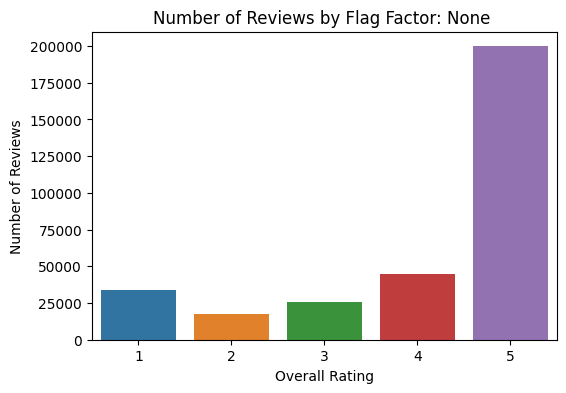

In [19]:
# None
plt.figure(figsize=(6, 4))
factor = 'None'
sns.countplot(data=df_review_prep, x="overallRating", hue=None)
plt.title(f'Number of Reviews by Flag Factor: {factor} ')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()

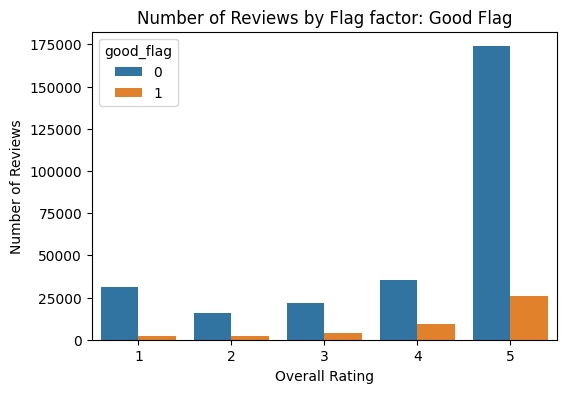

In [20]:
# Good
plt.figure(figsize=(6, 4))
factor = 'Good Flag'
sns.countplot(data=df_review_prep, x="overallRating", hue='good_flag') # How do I get True and False instead of 0 and 1
plt.title(f'Number of Reviews by Flag factor: {factor}')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()

# We see that a trend that a lot of ratings don't contain the word good in them. At the five stars rating, a lot of those reviews do not mention the word good so it must be the case that they may have said something better than the word good.

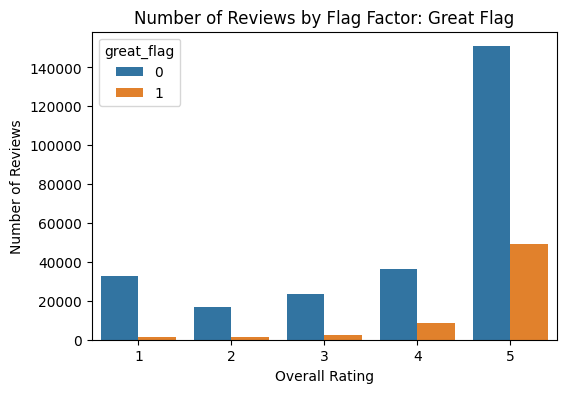

In [21]:
# Great
plt.figure(figsize=(6, 4))
factor = 'Great Flag'
sns.countplot(data=df_review_prep, x="overallRating", hue='great_flag')
plt.title(f'Number of Reviews by Flag Factor: {factor}')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()

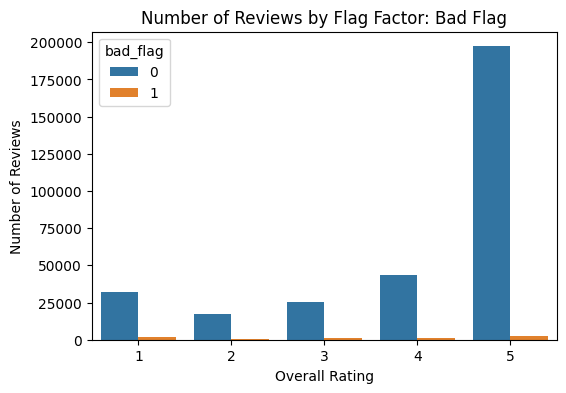

In [22]:
# Bad
plt.figure(figsize=(6, 4))
factor = 'Bad Flag'
sns.countplot(data=df_review_prep, x="overallRating", hue='bad_flag')
plt.title(f'Number of Reviews by Flag Factor: {factor}')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()

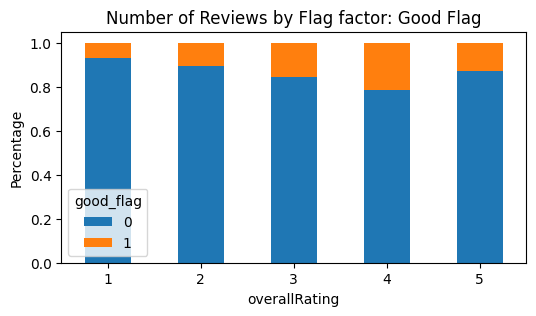

In [23]:
# Good
main_category = 'overallRating'
binary_category = 'good_flag'
factor = 'Good Flag'
df_grouped = df_review_prep.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.title(f'Number of Reviews by Flag factor: {factor}')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

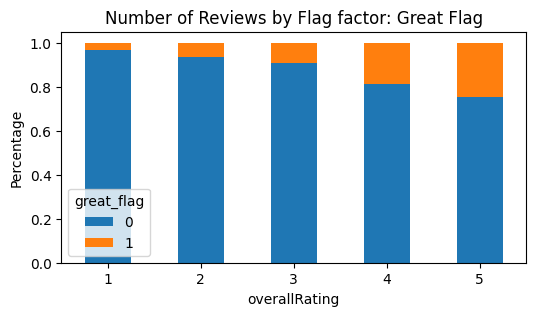

In [24]:
# Great
main_category = 'overallRating'
binary_category = 'great_flag'
factor = "Great Flag"
df_grouped = df_review_prep.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.title(f'Number of Reviews by Flag factor: {factor}')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()


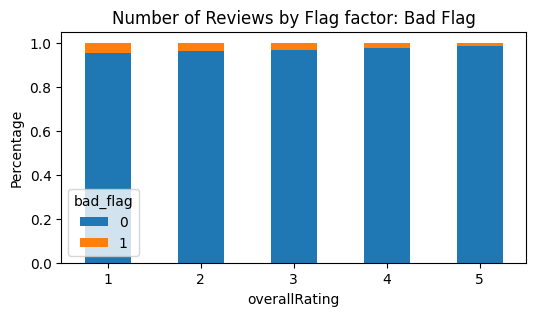

In [25]:
# Bad
main_category = 'overallRating'
binary_category = 'bad_flag'
factor = "Bad Flag"
df_grouped = df_review_prep.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.title(f'Number of Reviews by Flag factor: {factor}')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

## Step 5. Does Time Matter?

1. Clean datetimes: Change the data type of `reviewTime` to a standard type `datetime`
> Hint: Consider using `pd.to_datetime()`

2. Create 4 new variables to store the year, month, day, and day of week by applying transformation to `reviewTime`
> Hint:
```python
df['year'] = df['date_variable'].dt.year
df['month'] = df['date_variable'].dt.month
df['day'] = df['date_variable'].dt.day
df['day_of_week'] = df['date_variable'].dt.weekday # where 0 represents Monday
```

3. Group by `day_of_week`, then Report the following summaries in one single data frame named `df_summary`:
  - count the total number of reviews
  - calculate the mean of `overallRating`
  - calculate the mean of `review_len`


4. Create three Bar charts using `sns.barplot()` to answer the following questions:

- What is the most/least reviewed year?

- What year are you most likely to get the highest/lowest mean review length?

- For the data in July 2018, what day of week are you most likely to get the highest/lowest mean overall rating?

In [26]:
# 1. Clean datetimes: Change the data type of reviewTime to a standard type datetime
df_review_prep['reviewTime'] = pd.to_datetime(df_review_prep['reviewTime'])

In [27]:
# 2. Create 4 new variables to store the year, month, day and day of week by applying transformation to reviewTime
df_review_prep['month'] = df_review_prep['reviewTime'].dt.month
df_review_prep['year'] = df_review_prep['reviewTime'].dt.year
df_review_prep['day'] = df_review_prep['reviewTime'].dt.day
df_review_prep['day_of_week'] = df_review_prep['reviewTime'].dt.weekday #where 0 represents Monday

In [28]:
# 2. We will double check the variables we created and see if they are in our dataset
df_review_prep.columns

Index(['reviewerID', 'reviewTime', 'itemID', 'reviewText', 'overallRating',
       'verified', 'good_flag', 'great_flag', 'bad_flag', 'text_len', 'month',
       'year', 'day', 'day_of_week'],
      dtype='object')

In [29]:
# 3. Group by day_of_week, then Report the following summaries in one single data frame named df_summary
# Count the total number of reviews

df_summary = df_review_prep.groupby('day_of_week')['reviewText'].agg('count')
df_summary

day_of_week
0    51281
1    49809
2    48141
3    47575
4    44023
5    40234
6    41035
Name: reviewText, dtype: int64

In [30]:
# 3. Calculate the mean of overallRating
df_summary = df_review_prep.groupby('day_of_week')['overallRating'].agg('mean')
df_summary

day_of_week
0    4.109339
1    4.113815
2    4.103758
3    4.124687
4    4.117325
5    4.105980
6    4.123041
Name: overallRating, dtype: float64

In [31]:
# 3. Calculate the mean of review_len
df_summary = df_review_prep.groupby('day_of_week')['text_len'].agg('mean')
df_summary

day_of_week
0    172.393713
1    169.413881
2    173.003240
3    172.330257
4    174.571042
5    179.238157
6    175.262873
Name: text_len, dtype: float64

In [32]:
# 3. Now if we put it all together and want to make this fancier in terms of displaying the results
# We will groupby and aggregate the results all in one line of code, then use reset.index.
# Then we will use df to display our results
df_summary = df_review_prep.groupby('day_of_week').agg({'reviewText': ['count'], 'overallRating': ['mean'], 'text_len': 'mean'}).reset_index()
df_summary

# The first day of the week is Sunday (0) and ends at Saturday (6)

,day_of_week,reviewText,overallRating,text_len
,,count,mean,mean
0,0,51281,4.109339,172.393713
1,1,49809,4.113815,169.413881
2,2,48141,4.103758,173.003240
3,3,47575,4.124687,172.330257
4,4,44023,4.117325,174.571042
5,5,40234,4.105980,179.238157
6,6,41035,4.123041,175.262873


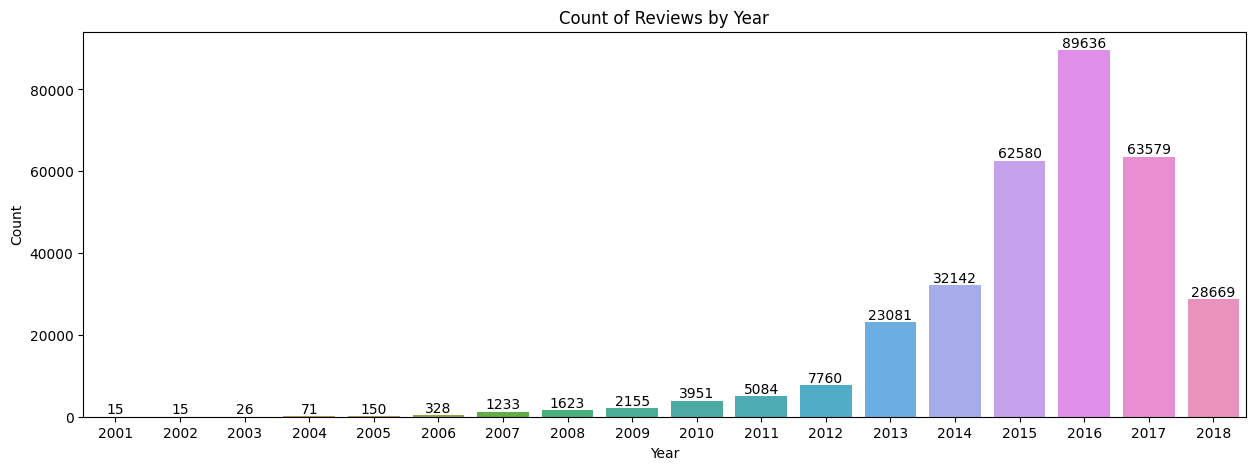

In [51]:
# 4. Create a Bar Chart
# # What is the most/least reviewed year?
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_review_prep,
                 x='year',
                 y='overallRating',
                 estimator='count',
                 errorbar=None)
ax.bar_label(ax.containers[0]);
plt.title('Count of Reviews by Year')
plt.xlabel('Year')
# Rotate x-axis labels
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

# Fix estimator, make to sure correct the axises and create a total

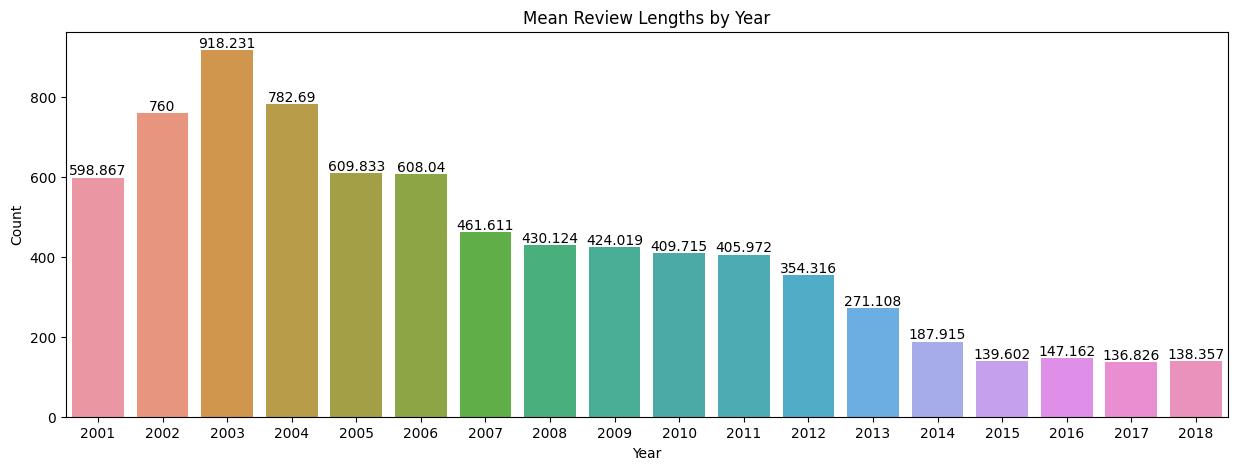

In [50]:
# 4. Create a bar chart
# What year are you most likely to get the highest/lowest mean review length?
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_review_prep,
                 x='year',
                 y='text_len',
                 estimator='mean',
                 errorbar=None)
ax.bar_label(ax.containers[0]);
plt.title('Mean Review Lengths by Year')
plt.xlabel('Year')
# Rotate x-axis labels
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

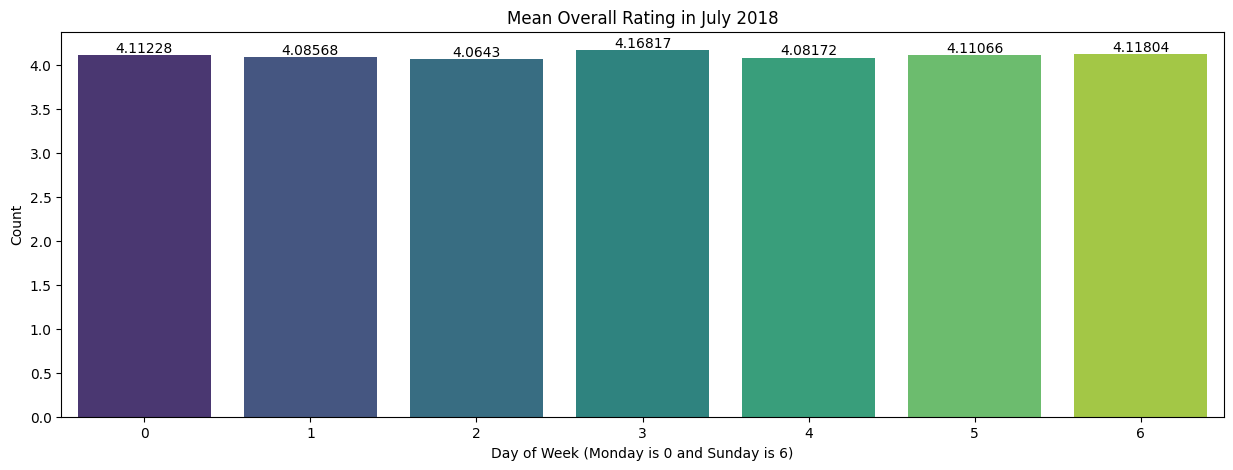


Day of the week with the highest mean overall rating in July 2018: 3

Day of the week with the lowest mean overall rating in July 2018: 2


In [49]:
# Let's create a subset/different data set for this new condition
# We want July 2018 and we will do this by using query result
july2018 = df_review_prep[df_review_prep['reviewTime'].dt.year == 2018]
july2018 = df_review_prep[df_review_prep['reviewTime'].dt.month == 7]

# Let's use groupb for july2018 and aggregate 'reviewTime' and put that in terms of day of week and then we also aggreate 'overallRating' and use the mean
day_of_week_mean_rating = july2018.groupby(july2018['reviewTime'].dt.dayofweek)['overallRating'].mean().reset_index()

# We are creating a querey result as we are curios which of the days of the week has the highest mean and lowest mean
# We will use .loc for the dataframe
# Then we will select the column "overallRating" and then find the max and min with idxmax/idxmin
# Then we select 'reviewTime' as our final column
highest_mean_rating_day = day_of_week_mean_rating.loc[day_of_week_mean_rating['overallRating'].idxmax(), 'reviewTime']
lowest_mean_rating_day = day_of_week_mean_rating.loc[day_of_week_mean_rating['overallRating'].idxmin(), 'reviewTime']

# Let's plot
plt.figure(figsize=(15,5))
ax = sns.barplot(data=day_of_week_mean_rating,
                 x='reviewTime',
                 y='overallRating',
                 palette = 'viridis',
                 errorbar=None)
ax.bar_label(ax.containers[0]);
plt.title('Mean Overall Rating in July 2018')
plt.xlabel('Day of Week (Monday is 0 and Sunday is 6)')
# Rotate x-axis labels
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

# To see exactly what day has the highest mean and lowest mean, we will use print
print('\nDay of the week with the highest mean overall rating in July 2018:', highest_mean_rating_day)
print('\nDay of the week with the lowest mean overall rating in July 2018:', lowest_mean_rating_day)

## Step 6. Chat with your Data

In this final step, let's build a naive chatbot that can answer simple questions about your data using a **While Loop** and **If-Else Structures**. A good reference to complete this task is [here](https://colab.research.google.com/github/MonkeyWrenchGang/PythonBootcamp/blob/main/day_3/3_4_Journey_into_WHILE_Loops.ipynb). Please follow the instructions and code the missing parts.

-  Create a greeting for the user when the chatbot starts, use the `print()` function to display it. For example:
```python
print("Hello! I am your friendly chatbot that can answer simple questions about your data.")
```
- Use a while loop to start a continuous conversation. The conversation should continue until the user types 'exit'.
- Inside the while loop, use the `input()` function to get the name of a variable from the user, store it as `input_variable`. For example:
```python
input_variable = input("What variable would you like to ask me? (Type 'exit' to end the conversation) ")
```
- Check if the user's input is a valid column in the data frame `df_review_prep`.
 - If it is, print a message indicating that it's a valid variable and display its data type. For example:
 ```python
print("Good!", input_variable, "is a valid variable in this dataset")
print('Its data type:', df_review_prep[input_variable].dtypes)
 ```
 - If it isn't, the user should be notified and asked to try again. For example:
 ```python
print('Sorry, your input', input_variable,'is not a variable of the dataset. Please try it again :)')
 ```

- If the user's chosen variable is an integer type 'int64'
  - Use another `input()` to ask what statistic to report. The options should be 'count', 'mean', 'max', 'min', or 'all'. For example:
  ```python
  summary_stats = input("What statistic would you like to report? Type one from: [count, mean, max, min, all]")
  ```
  - Depending on the user's input, calculate and display the requested statistic for this variable.
  - If the input isn't recognized, display an error message. For example:
  ```python
  print('Please input a valid statistic.')
  ```

- If the user's chosen variable is NOT an integer type 'int64'
```python
print('Under development.. Stay tuned :)')
```

Example conversation：
```
Hello! I am your friendly chatbot that can answer simple questions about your data.
What variable would you like to ask me? (Type 'exit' to end the conversation) overallRating
Good! overallRating is a valid variable in this dataset
Its data type: int64
What statistic would you like to report? Type one from: [count, mean, max, min, all] all
count    322098.000000
mean          4.113881
std           1.361587
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overallRating, dtype: float64
What variable would you like to ask me? (Type 'exit' to end the conversation) exit
Goodbye! It was nice chatting with you.
```

In [53]:
df_review_prep.columns

Index(['reviewerID', 'reviewTime', 'itemID', 'reviewText', 'overallRating',
       'verified', 'good_flag', 'great_flag', 'bad_flag', 'text_len', 'month',
       'year', 'day', 'day_of_week'],
      dtype='object')

In [82]:
# Greet the user
print("Hello! I am your friendly chatbot that can answer simple questions about your data.")

# Start the conversation
while True:
    input_variable = input("What variable would you like to ask me? (Type 'exit' to end the conversation) ")

    # Check if the user wants to exit
    if input_variable.lower() in ["exit","quit"]:
        print("Goodbye! It was nice chatting with you.")
        break

    # Look up response in the our data frame's column
    if input_variable in df_review_prep.columns:
      print("Good!", input_variable, "is a valid variable in this dataset")
      print('Its data type:', df_review_prep[input_variable].dtypes)

    # Let's go to step 2, If the user's chosen variable is an integer type 'int64'
    # We are also going to create a nested if statement
      if df_review_prep[input_variable].dtypes == 'int64':
          summary_stats = input("What statistic would you like to report? Type one from: [count, mean, max, min, all]")
          #Nested Part
          if summary_stats.lower() == 'count':
                result = df_review_prep[input_variable].count()
          elif summary_stats.lower() == 'mean':
                result = df_review_prep[input_variable].mean()
          elif summary_stats.lower() == 'max':
                result = df_review_prep[input_variable].max()
          elif summary_stats.lower() == 'min':
                result = df_review_prep[input_variable].min()
          elif summary_stats.lower() == 'std':
                result = df_review_prep[input_variable].std()
          elif summary_stats.lower() == 'all':
                result = {                        # Created a dictionary
                    'Count': df_review_prep[input_variable].count(),
                    'Mean': df_review_prep[input_variable].mean(),
                    'Standard Deviation': df_review_prep[input_variable].std(),
                    'Min': df_review_prep[input_variable].min(),
                    '25 Percentile': df_review_prep[input_variable].quantile(0.25),
                    '50th Percentile (Median)': df_review_prep[input_variable].quantile(0.50),
                    '75 Percentile': df_review_prep[input_variable].quantile(0.75),
                    'Max': df_review_prep[input_variable].max()
                }
          else:
            print('Please input a valid statistic.')
            continue
          if isinstance(result, dict):            # Use isinstance(obj, class_or_tuple) to check our result. We are checking if result is in dictionary
            for stat, value in result.items():    # For loop
              if stat == 'Max':                   # Define Stat
                print(f'{stat}: {value}')
                print(f'Variable name: {input_variable}')
                print(f'Data Type: {df_review_prep[input_variable].dtype}')
              else:
                print(f'{stat}: {value}')
          else:
              print(f'{summary_stats.capitalize()}: {result}')
      else:
        print('Under development.. Stay Tuned :)')
    else:
      print('Sorry, your input',input_variable,'is not a variable of the dataset. Please try again :)')

# End of the program

Hello! I am your friendly chatbot that can answer simple questions about your data.
What variable would you like to ask me? (Type 'exit' to end the conversation) overallRating
Good! overallRating is a valid variable in this dataset
Its data type: int64
What statistic would you like to report? Type one from: [count, mean, max, min, all]all
Count: 322098
Mean: 4.113881489484567
Standard Deviation: 1.3615869018004614
Min: 1
25 Percentile: 4.0
50th Percentile (Median): 5.0
75 Percentile: 5.0
Max: 5
Variable name: overallRating
Data Type: int64
What variable would you like to ask me? (Type 'exit' to end the conversation) exit
Goodbye! It was nice chatting with you.



# Finally

**Important**: Wrap this up in a notebook and convert it to **HTML**, to exceed the bar - make sure things look good.